In [ ]:
import sklearn
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42
                   )

In [ ]:
len(X)

1000

In [ ]:
 X[0]

array([0.75424625, 0.23148074])

In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


<ipython-input-29-9709be6f8d21>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X[:,0],


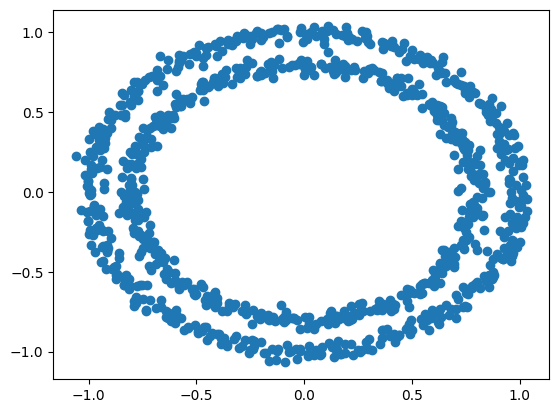

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            cmap = plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float)

In [ ]:
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size =0.2,
                                                random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:

class CircleModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,5)
        self.layer_2 = nn.Linear(5,1)
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModel0().to(device)
model_0


CircleModel0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
"""
class CircleModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers=  nn.Sequential(
            nn.Linear(2,5),
            nn.Linear(5,1)
        )
    def forward(self,x):
        return self.two_layers(x)

model_0 = CircleModel0().to(device)
model_0
"""

'\nclass CircleModel0(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.two_layers=  nn.Sequential(\n            nn.Linear(2,5),\n            nn.Linear(5,1)\n        )\n    def forward(self,x):\n        return self.two_layers(x)\n\nmodel_0 = CircleModel0().to(device)\nmodel_0\n'

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
    untrained_pred = model_0(X_test.to(device))
untrained_pred[:5]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
loss_fun = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.1)


In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
def accuracy_fun(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc


In [ ]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
#using sigmoid on model logits to turn into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    #loss = loss_fun(torch.sigmoid(y_logits),y_train)  //if we only used BCE LOSS
    loss = loss_fun(y_logits,y_train)
    acc = accuracy_fun(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fun(test_logits,y_test)
        test_acc = accuracy_fun(y_test,test_pred)
    if epoch%10==0:
        print(f"Epoch:{epoch}| Loss {loss.item():.5f}, Acc {acc:.2f}|Test_loss {test_loss.item():.5f}|test acc {test_acc:.2f}")

Epoch:0| Loss 0.69796, Acc 51.88|Test_loss 0.69440|test acc 58.00
Epoch:10| Loss 0.69590, Acc 51.25|Test_loss 0.69305|test acc 53.00
Epoch:20| Loss 0.69490, Acc 51.62|Test_loss 0.69254|test acc 49.50
Epoch:30| Loss 0.69435, Acc 51.12|Test_loss 0.69236|test acc 49.50
Epoch:40| Loss 0.69401, Acc 50.88|Test_loss 0.69232|test acc 51.00
Epoch:50| Loss 0.69378, Acc 50.25|Test_loss 0.69234|test acc 50.00
Epoch:60| Loss 0.69362, Acc 50.00|Test_loss 0.69239|test acc 51.50
Epoch:70| Loss 0.69351, Acc 50.25|Test_loss 0.69246|test acc 51.00
Epoch:80| Loss 0.69342, Acc 49.88|Test_loss 0.69254|test acc 50.00
Epoch:90| Loss 0.69336, Acc 49.88|Test_loss 0.69262|test acc 53.00


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary

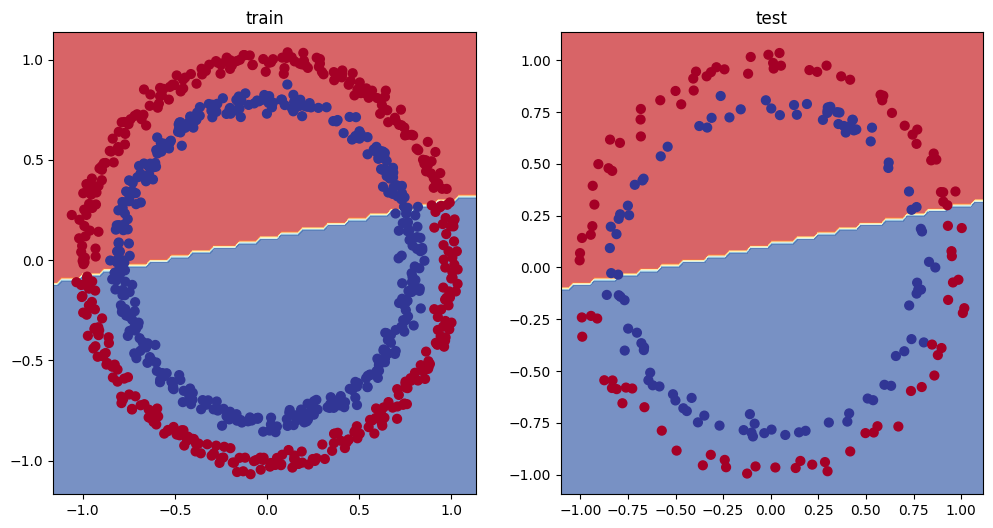

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1= nn.Linear(2,10)
        self.layer_2 = nn.Linear(10,10)
        self.layer_3 = nn.Linear(10,1)

    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fun = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(params = model_1.parameters(),lr=0.1)

In [ ]:
def accuracy_fun(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [ ]:
epochs = 1000
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fun(y_logits,y_train)
    acc = accuracy_fun(y_train,y_pred)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fun(test_logits,y_test)
        test_acc = acc
    if epoch%100==0:
        print(f"Epoch:{epoch}| Loss {loss.item():.5f}, Acc {acc:.2f}|Test_loss {test_loss.item():.5f}|test acc {test_acc:.2f}")


Epoch:0| Loss 0.69396, Acc 50.88|Test_loss 0.69261|test acc 50.88
Epoch:100| Loss 0.69305, Acc 50.38|Test_loss 0.69379|test acc 50.38
Epoch:200| Loss 0.69299, Acc 51.12|Test_loss 0.69437|test acc 51.12
Epoch:300| Loss 0.69298, Acc 51.62|Test_loss 0.69458|test acc 51.62
Epoch:400| Loss 0.69298, Acc 51.12|Test_loss 0.69465|test acc 51.12
Epoch:500| Loss 0.69298, Acc 51.00|Test_loss 0.69467|test acc 51.00
Epoch:600| Loss 0.69298, Acc 51.00|Test_loss 0.69468|test acc 51.00
Epoch:700| Loss 0.69298, Acc 51.00|Test_loss 0.69468|test acc 51.00
Epoch:800| Loss 0.69298, Acc 51.00|Test_loss 0.69468|test acc 51.00
Epoch:900| Loss 0.69298, Acc 51.00|Test_loss 0.69468|test acc 51.00


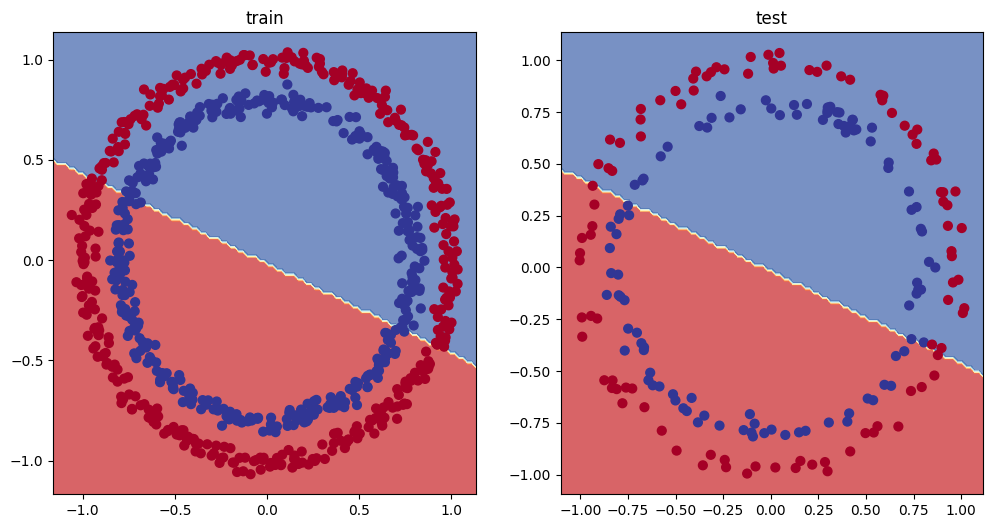

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
        test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.57896, Test loss: 0.47265
Epoch: 100 | Train loss: 0.05652, Test loss: 0.17491
Epoch: 200 | Train loss: 0.05272, Test loss: 0.15038
Epoch: 300 | Train loss: 0.05733, Test loss: 0.14733
Epoch: 400 | Train loss: 0.05780, Test loss: 0.14758
Epoch: 500 | Train loss: 0.04943, Test loss: 0.12419
Epoch: 600 | Train loss: 0.05284, Test loss: 0.14350
Epoch: 700 | Train loss: 0.07244, Test loss: 0.12574
Epoch: 800 | Train loss: 0.04493, Test loss: 0.11135
Epoch: 900 | Train loss: 0.05377, Test loss: 0.13252


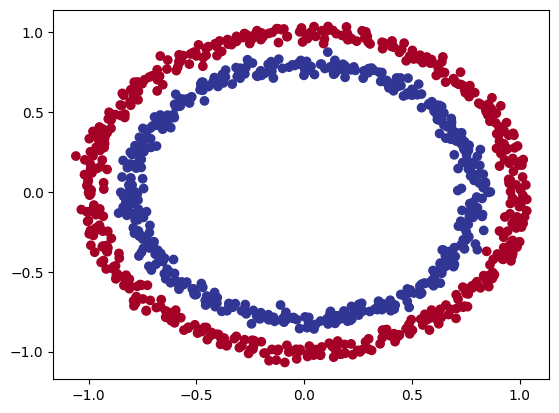

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
#non linear activation function in a new model for detection circular dataset or non linear dataset
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2,out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10,out_features = 10)
        self.layer_4 = nn.Linear(in_features = 10,out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10,out_features = 1)
        self.relu = nn.ReLU()
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr = 0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

epochs = 1000
for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fun(y_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fun(y_test,test_pred)
    if epoch%100==0:
        print(f"Epoch:{epoch}| Loss {loss.item():.5f}, Acc {acc:.2f}|Test_loss {test_loss.item():.5f}|test acc {test_acc:.2f}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

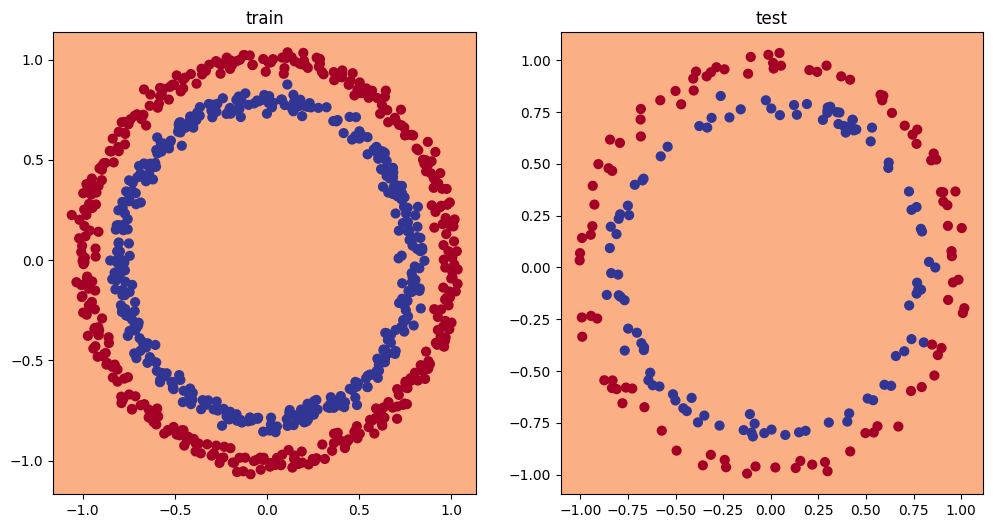

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

In [ ]:
A = torch.arange(-10,10,1,dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

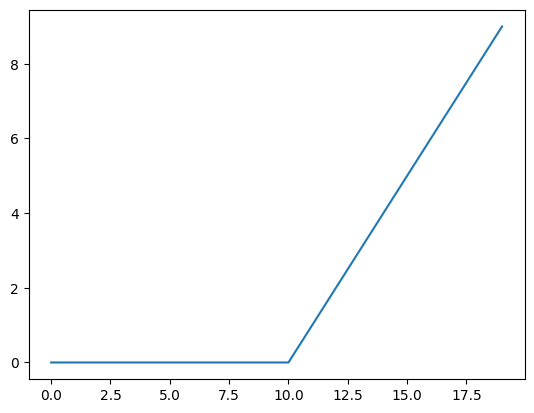

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x):
    return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

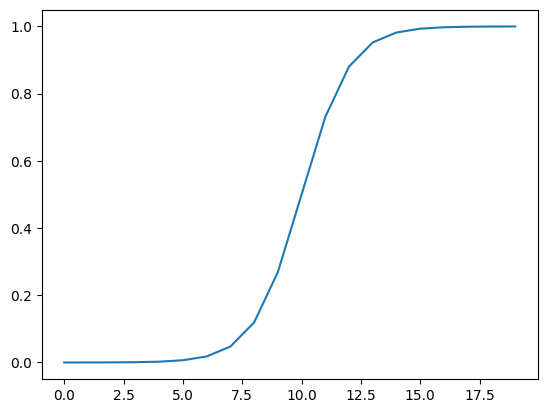

In [ ]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))
plt.plot(sigmoid(A))

# MULTI CLASS


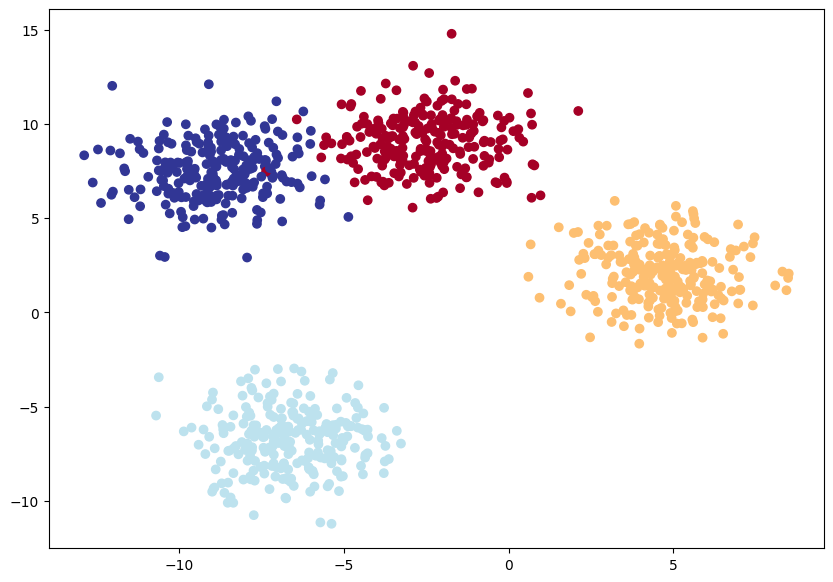

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob_train ,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

plt.figure(figsize= (10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap = plt.cm.RdYlBu)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features,out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,out_features = output_features)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features =4,
                    hidden_units =8).to(device)

In [ ]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),lr = 0.1)

In [ ]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits,dim = 1)
y_pred_probs

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360],
        [0.3496, 0.1389, 0.1822, 0.3294],
        [0.3085, 0.3588, 0.1246, 0.2081],
        [0.3688, 0.1292, 0.1565, 0.3454],
        [0.3644, 0.1276, 0.1598, 0.3483],
        [0.3708, 0.1234, 0.1506, 0.3551],
        [0.3358, 0.1438, 0.2004, 0.3200],
        [0.3332, 0.1429, 0.2029, 0.3209],
        [0.2996, 0.1844, 0.2712, 0.2448],
        [0.3450, 0.1320, 0.1827, 0.3403],
        [0.3284, 0.1473, 0.2110, 0.3133],
        [0.3434, 0.1366, 0.1875, 0.3325],
        [0.3436, 0.1464, 0.1930, 0.3170],
        [0.3120, 0.2068, 0.2453, 0.2359],
        [0.2962, 0.1830, 0.2844, 0

In [ ]:
y_preds = torch.argmax(y_pred_probs,dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_blob_train).squeeze()
    y_pred = torch.softmax(y_logits,dim = 1).argmax(dim=1)
    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fun(y_blob_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test).squeeze()
        test_preds = torch.softmax(test_logits,dim = 1).argmax(dim=1)
        test_loss = loss_fn(test_logits,y_blob_test)
        test_acc = accuracy_fun(y_blob_test,test_preds)
    if epoch%10==0:
        print(f"Epoch:{epoch}| Loss {loss.item():.5f}, Acc {acc:.2f}|Test_loss {test_loss.item():.5f}|test acc {test_acc:.2f}")


Epoch:0| Loss 1.15883, Acc 40.38|Test_loss 1.07554|test acc 48.00
Epoch:10| Loss 0.64476, Acc 96.75|Test_loss 0.66069|test acc 97.50
Epoch:20| Loss 0.42535, Acc 98.50|Test_loss 0.43074|test acc 100.00
Epoch:30| Loss 0.25294, Acc 99.12|Test_loss 0.24508|test acc 99.50
Epoch:40| Loss 0.11232, Acc 99.25|Test_loss 0.10229|test acc 99.50
Epoch:50| Loss 0.06627, Acc 99.25|Test_loss 0.05848|test acc 99.50
Epoch:60| Loss 0.05068, Acc 99.25|Test_loss 0.04293|test acc 99.50
Epoch:70| Loss 0.04300, Acc 99.25|Test_loss 0.03491|test acc 99.50
Epoch:80| Loss 0.03836, Acc 99.25|Test_loss 0.02988|test acc 99.50
Epoch:90| Loss 0.03525, Acc 99.25|Test_loss 0.02663|test acc 99.50


In [ ]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits,dim = 1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
y_pred = torch.argmax(y_pred_probs,dim = 1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

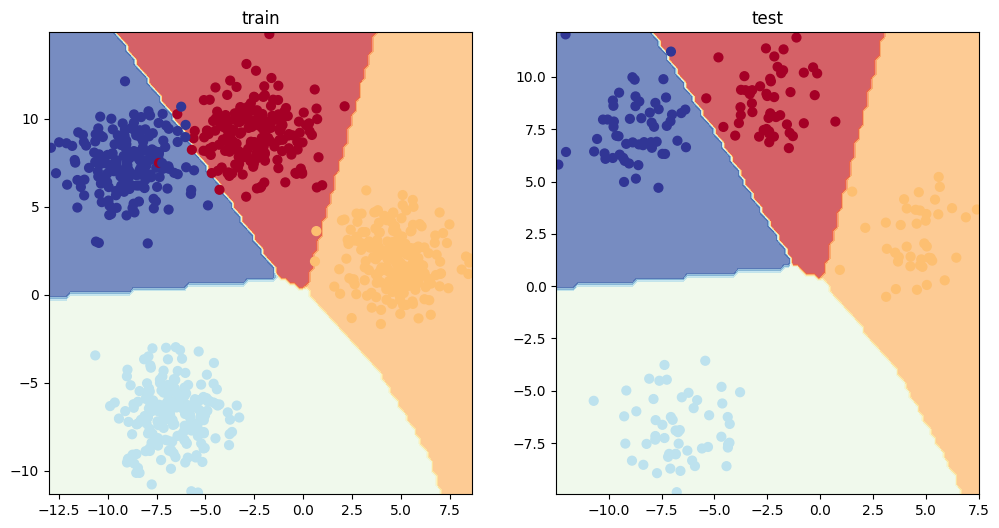

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 16.9 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Assuming your task is multiclass classification, since you have y_pred_probs
torch_metric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)  # replace 3 with the actual number of classes in your data

torch_metric_accuracy(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')